<span style="font-size: 32pt; font-family: 'Times New Roman'; color: blue; "> Notebook to viz FaIR output </span> 

In [1]:
import pickle
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt

In [ ]:
pathDICT = {
    "debug_Path" : "/Users/pk695/werk.M2/FACTS_dev/2401_RFF.SPs/facts_development/facts/experiments.RFF.SPs/debug_rffLL_project",   
}

In [ ]:
file=f"{pathDICT['debug_Path']}/project.pkl"

with open(file, "rb") as f:
    loaded_data = pickle.load(f)

# Access each variable
rffemfull_array     = loaded_data["rffemfull_array"]
rff_sp_array        = loaded_data["rff_sp_array"]
#
temps               = loaded_data["temps"]
deeptemps           = loaded_data["deeptemps"]
ohcs                = loaded_data["ohcs"]




<xarray.Dataset> Size: 68MB
Dimensions:    (rff_sp: 10000, Year: 281, gas: 3)
Coordinates:
  * rff_sp     (rff_sp) int64 80kB 1 2 3 4 5 6 ... 9996 9997 9998 9999 10000
  * Year       (Year) int64 2kB 2020 2021 2022 2023 2024 ... 2297 2298 2299 2300
  * gas        (gas) object 24B 'C' 'CH4' 'N2'
Data variables:
    emissions  (gas, rff_sp, Year) float64 67MB 11.08 11.21 ... 0.1785 0.1785
Attributes:
    Description:      A compilation of 3-ghg gas emissions files from RFF con...
    Version:          v2. These emissions current as of end of Jan/early Feb ...
    Emissions Units:  C: Gt/C, CH4: Mt/CH4, N2O: Mt/N2
    Source files:     impactlab-data/gcp/integration/RFF-SP/v2/emissions/

In [29]:
file=f"{pathDICT['debug_Path']}/rff.LL.temperature.fair.rffLL_preprocess.pkl"
with open(file, 'rb') as f:
	preprocess_data = pickle.load(f)

emis	 			= preprocess_data["emis"]
rffemissions	 	= preprocess_data["rffemissions"]
REFERENCE_YEAR 	    = preprocess_data["REFERENCE_YEAR"]
t 					= np.arange(REFERENCE_YEAR, 2501)

# pairds 			    = preprocess_data["pairds"]
# scenario 		    = preprocess_data["scenario"]
# rcmip_file 		    = preprocess_data["rcmip_file"]

/var/folders/gp/3_y9nhmx1_q9m81jy_j7f8ddyrdbs6/T/ipykernel_44815/3590536578.py:3: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  preprocess_data = pickle.load(f)


In [28]:
print('\n <======>')
print('rffemissions = ',rffemissions)
print('<======>')
print('emis shape:: ',emis.shape)
print('<======>')
print(f"rffemfull_array shape:: {rffemfull_array.shape}")
print('<======>')


 <======>
rffemissions =  <xarray.Dataset> Size: 68MB
Dimensions:    (rff_sp: 10000, Year: 281, gas: 3)
Coordinates:
  * rff_sp     (rff_sp) int64 80kB 1 2 3 4 5 6 ... 9996 9997 9998 9999 10000
  * Year       (Year) int64 2kB 2020 2021 2022 2023 2024 ... 2297 2298 2299 2300
  * gas        (gas) object 24B 'C' 'CH4' 'N2'
Data variables:
    emissions  (gas, rff_sp, Year) float64 67MB 11.08 11.21 ... 0.1785 0.1785
Attributes:
    Description:      A compilation of 3-ghg gas emissions files from RFF con...
    Version:          v2. These emissions current as of end of Jan/early Feb ...
    Emissions Units:  C: Gt/C, CH4: Mt/CH4, N2O: Mt/N2
    Source files:     impactlab-data/gcp/integration/RFF-SP/v2/emissions/
<======>
emis shape::  (751, 40)
<======>
rffemfull_array shape:: (10, 751, 40)
<======>


1. `rffemissions` has 3 gasses - 'C' 'CH4' 'N2' , IDX (0,1,2)

1. `emis` and `rffemfull_array` have at "C" ,"CH4" ,"N2O" ,"N2" , IDX (1,3,4,4)
    * first column is time. 

In [38]:
rffemissionsGASIDX={
    "C": 0,
    "CH4": 1,
    "N2": 2 }

emisGASIDX={
    "C": 1,
    "CH4": 3,
    "N2O": 4,
    "N2": 4 }

<span style="font-size: 32pt; font-family: 'Times New Roman'; color: blue; "> Plot:: FaIR IP  </span> 

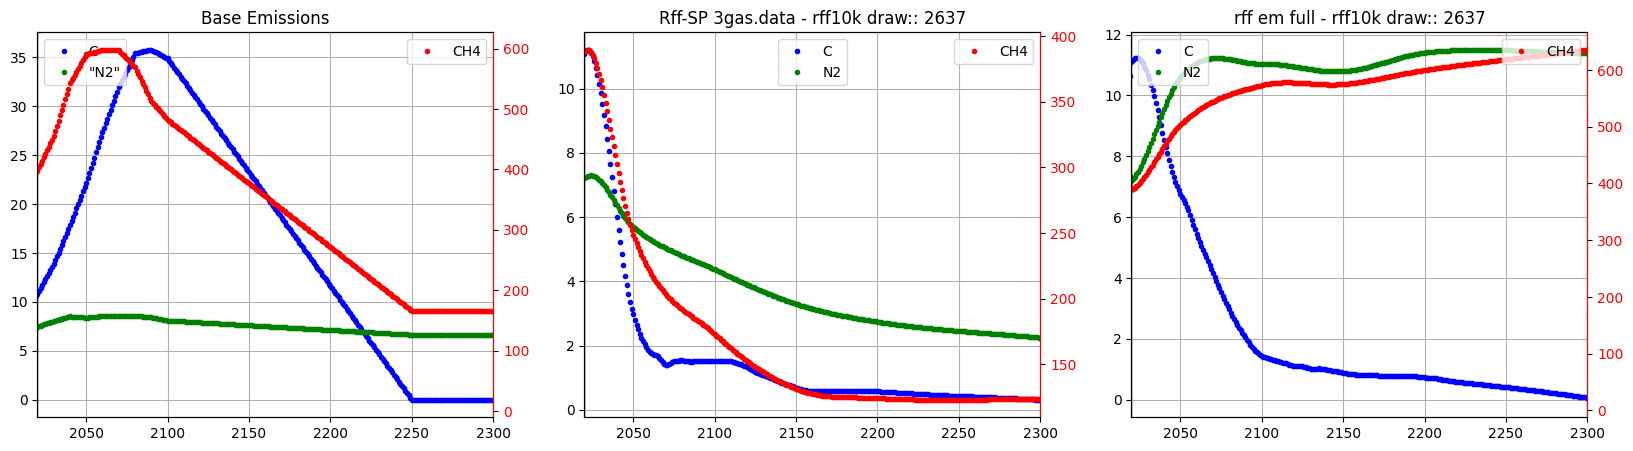

In [96]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))



# ===========> PLOT emis
ax0=axs[0]
title="Base Emission" # (40 gas species)
# C -->
ax0.plot(emis[:,0] , emis[:,emisGASIDX["C"]],'.b',label='C'); 
# CH4-->
ax00 = ax0.twinx()
ax00.plot(emis[:,0] , emis[:,emisGASIDX["CH4"]],'.r',label='CH4'); 
ax00.tick_params(axis='y', labelcolor='r'); ax00.spines['right'].set_color('r')
# N2 --> 
ax0.plot(emis[:,0] , emis[:,emisGASIDX["N2"]],'.g',label='"N2"'); 
# Ax properties
ax0.legend(loc="upper left"); ax00.legend(loc="upper right")
axs[0].set_title(f'Base Emissions'); ax0.grid(True)

# ===========>
sample=0

# ===========> PLOT rffemissions (3gas)
rffspIDX=rff_sp_array[sample].item()
ax1=axs[1]
# C
ax1.plot(rffemissions['Year'],rffemissions['emissions'][rffemissionsGASIDX["C"],rffspIDX,:],'.b',label='C'); 
# CH4
ax11 = ax1.twinx()
ax11.plot(rffemissions['Year'],rffemissions['emissions'][rffemissionsGASIDX["CH4"],rffspIDX,:],'.r',label='CH4'); 
ax11.tick_params(axis='y', labelcolor='r'); ax11.spines['right'].set_color('r')
# N2
ax1.plot(rffemissions['Year'],rffemissions['emissions'][rffemissionsGASIDX["N2"],rffspIDX,:],'.g',label='N2'); 
# Ax properties
ax1.legend(loc="upper center"); ax11.legend(loc="upper right")
axs[1].set_title(f'Rff-SP 3gas.data - rff10k draw:: {rffspIDX}'); ax1.grid(True)


# ===========> PLOT # New Emission (40 gas species)

ax2=axs[2]
# C
ax2.plot(rffemfull_array[sample,:,0],rffemfull_array[sample,:,emisGASIDX["C"]],'.b',label='C'); 
# CH4
ax22 = ax2.twinx()
ax22.plot(rffemfull_array[sample,:,0],rffemfull_array[sample,:,emisGASIDX["CH4"]],'.r',label='CH4'); 
ax22.tick_params(axis='y', labelcolor='r'); ax22.spines['right'].set_color('r')
# N2
ax2.plot(rffemfull_array[sample,:,0],rffemfull_array[sample,:,emisGASIDX["N2"]],'.g',label='N2'); 
# Ax properties
ax2.legend(loc="upper left"); ax22.legend(loc="upper right")
ax2.set_title(f'rff em full - rff10k draw:: {rffspIDX}'); ax2.grid(True)

for ii in range(3): axs[ii].axvline(x=2020, color='black', linestyle='-', linewidth=1)
for ii in range(3):  axs[ii].set_xlim(2020,2300); 


**I dont understand this fully.** 

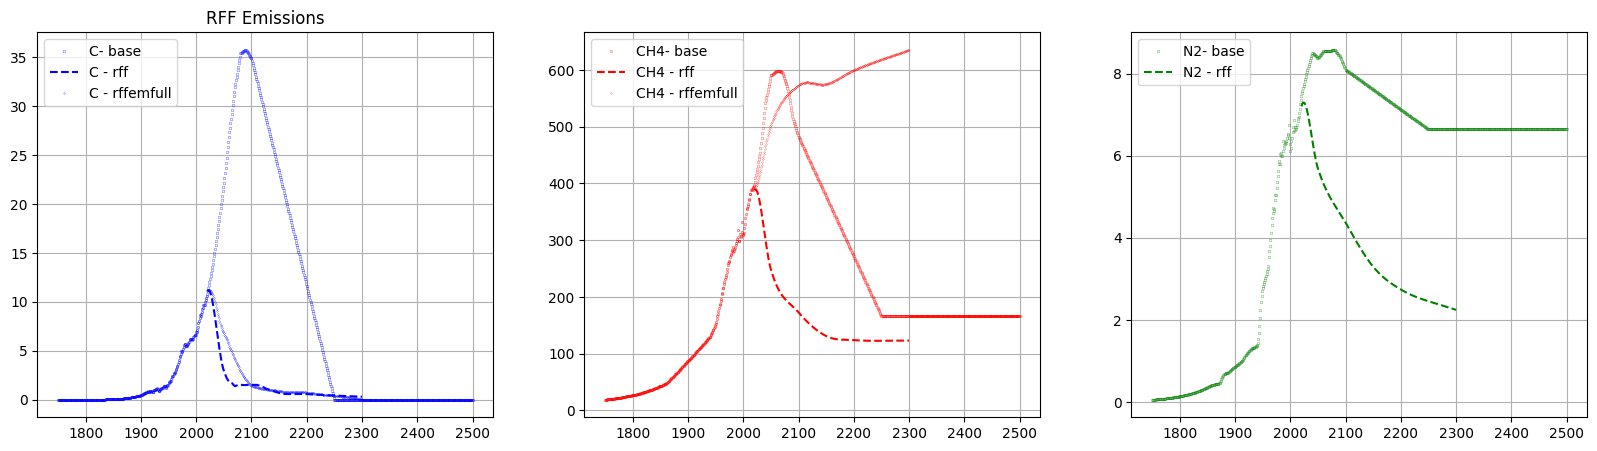

In [89]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# ===========> PLOT emis
ax0=axs[0]
# emis -->
ax0.plot(emis[:,0] , emis[:,emisGASIDX["C"]],'ob',label='C- base', mfc='none', mew=.2, ms=2);
# rffemissions
ax0.plot(rffemissions['Year'],rffemissions['emissions'][rffemissionsGASIDX["C"],rffspIDX,:],'--b',label='C - rff', mfc='none', mew=.2, ms=2);
#rffemfull_array
ax0.plot(rffemfull_array[sample,:,0],rffemfull_array[sample,:,emisGASIDX["C"]],'.b',label='C - rffemfull', mfc='none', mew=.2, ms=2);
# Ax properties
ax0.legend(loc="upper left"); 
axs[0].set_title(f'RFF Emissions'); ax0.grid(True)



# ===========> PLOT emis
ax0=axs[1]
# emis -->
ax0.plot(emis[:,0] , emis[:,emisGASIDX["CH4"]],'or',label='CH4- base', mfc='none', mew=.2, ms=2);
# rffemissions
ax0.plot(rffemissions['Year'],rffemissions['emissions'][rffemissionsGASIDX["CH4"],rffspIDX,:],'--r',label='CH4 - rff', mfc='none', mew=.2, ms=2);
# rffemfull_array
ax0.plot(rffemfull_array[sample,:,0],rffemfull_array[sample,:,emisGASIDX["CH4"]],'.r',label='CH4 - rffemfull', mfc='none', mew=.2, ms=2);
# Ax properties
ax0.legend(loc="upper left"); 
axs[0].set_title(f'RFF Emissions'); ax0.grid(True)


# ===========> PLOT emis
ax0=axs[2]
# emis -->
ax0.plot(emis[:,0] , emis[:,emisGASIDX["N2"]],'og',label='N2- base', mfc='none', mew=.2, ms=2);
# rffemissions
ax0.plot(rffemissions['Year'],rffemissions['emissions'][rffemissionsGASIDX["N2"],rffspIDX,:],'--g',label='N2 - rff', mfc='none', mew=.2, ms=2);
# rffemfull_array
# ax0.plot(rffemfull_array[sample,:,0],rffemfull_array[sample,:,emisGASIDX["N2"]],'.g',label='N2 - rffemfull', mfc='none', mew=2, ms=6);
# Ax properties
ax0.legend(loc="upper left"); 
axs[0].set_title(f'RFF Emissions'); ax0.grid(True)



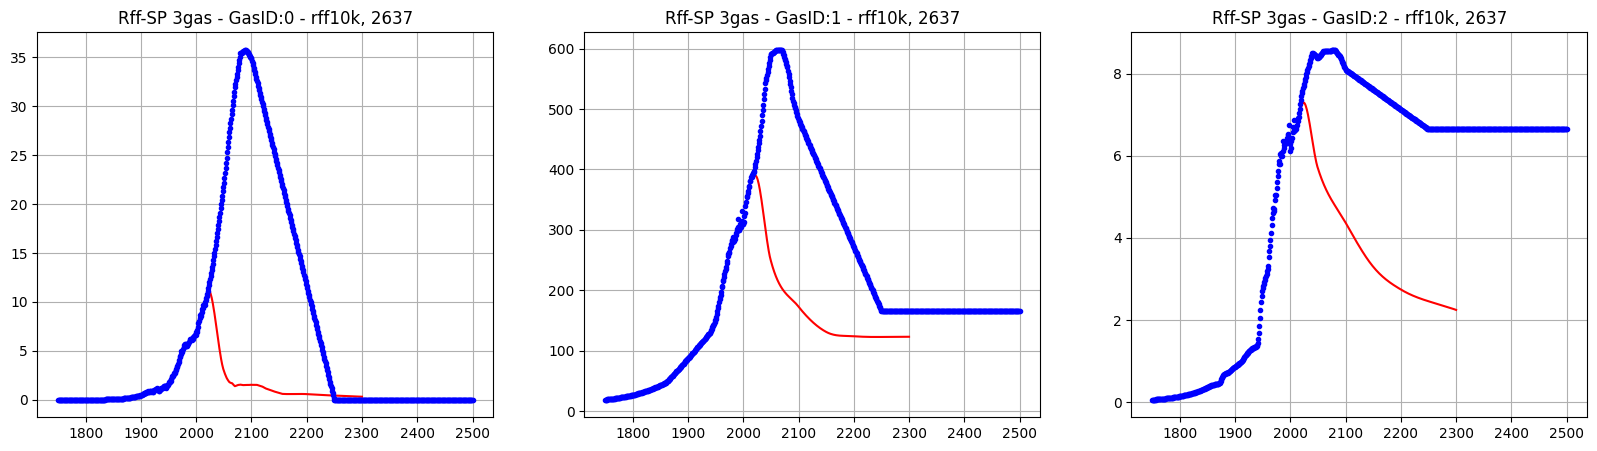

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

rffspIDX=rff_sp_array[sample].item()

# --
gas=0
axs[0].plot(rffemissions['Year'],rffemissions['emissions'][gas,rffspIDX,:],'-r',label='rffemfull_array'); axs[0].grid(True)
axs[0].set_title(f'Rff-SP 3gas - GasID:{gas} - rff10k, {rffspIDX}')
#
axs[0].plot(emis[:,0],emis[:,gas+1],'.b',label='base emissions'); # first column of emis is time


#--
gas=1
axs[1].plot(rffemissions['Year'],rffemissions['emissions'][gas,rffspIDX,:],'-r',label='rffemfull_array'); axs[1].grid(True)
axs[1].set_title(f'Rff-SP 3gas - GasID:{gas} - rff10k, {rffspIDX}')
#
axs[1].plot(emis[:,0],emis[:,gas+2],'.b',label='base emissions'); # first column of emis is time

# --
gas=2
axs[2].plot(rffemissions['Year'],rffemissions['emissions'][gas,rffspIDX,:],'-r',label='rffemfull_array'); axs[2].grid(True)
axs[2].set_title(f'Rff-SP 3gas - GasID:{gas} - rff10k, {rffspIDX}')

axs[2].plot(emis[:,0],emis[:,gas+2],'.b',label='base emissions'); # first column of emis is time

Text(0.5, 1.0, 'rff em full - GasID:4 - rff10k Gas, 2637')

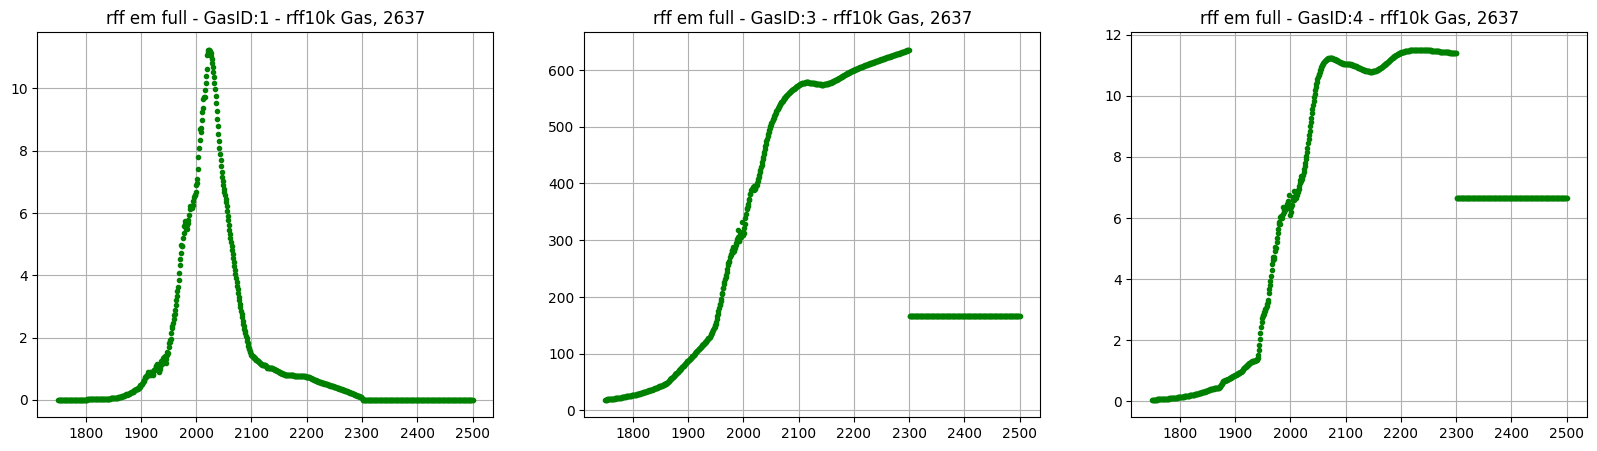

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

rffspIDX=rff_sp_array[sample].item()

# --
gas=0
sample=0

axs[0].plot(rffemfull_array[sample,:,0],rffemfull_array[sample,:,gas+1],'.g',label='rffemfull_array'); # first column of rffemfull_array is time
axs[0].grid(True)
axs[0].set_title(f'rff em full - GasID:{gas+1} - rff10k Gas, {rffspIDX}')


# --
gas=1
sample=0

axs[1].plot(rffemfull_array[sample,:,0],rffemfull_array[sample,:,gas+2],'.g',label='rffemfull_array'); # first column of rffemfull_array is time
axs[1].grid(True)
axs[1].set_title(f'rff em full - GasID:{gas+2} - rff10k Gas, {rffspIDX}')


# --
gas=2
sample=0

axs[2].plot(rffemfull_array[sample,:,0],rffemfull_array[sample,:,gas+2],'.g',label='rffemfull_array'); # first column of rffemfull_array is time
axs[2].grid(True)
axs[2].set_title(f'rff em full - GasID:{gas+2} - rff10k Gas, {rffspIDX}')

In [ ]:

nc['emissions'][0,0,rffspIDX,:].values


Matts question regarding SL fingerprints We want to ‘re-do’ the IPCC/NASA projections for Antarctica using Natalya Gomez and Holly Hann’s latest projections. We assume we will use Natalya’s SL fingerprint. How to handle near-field VLM?

---

In [ ]:
<span style="font-size: 32pt; font-family: 'Times New Roman'; color: blue; "> Plot:: FaIR OP  </span> 
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].plot(t,deeptemps[1,:],'-b',label='Deep Ocean Temp'); axs[0].grid(True)
axs[1].plot(t,ohcs[1,:],'--b', label='Ocean Heat Content'); axs[1].grid(True)
axs[2].plot(t,temps[1, :], '-r', label='temps'); axs[2].grid(True)
axs[3].plot(rff_sp_array[:], '*', label='rff sps IDX'); axs[3].grid(True)

axs[0].legend()  ; axs[1].legend(); axs[2].legend() ; axs[3].legend()


---

<span style="font-size: 12pt; font-family: 'Times New Roman'; color: blue; "> Plot  </span> 

In [ ]:
species = [
    'CO2|MAGICC Fossil and Industrial', 'CO2|MAGICC AFOLU', 'CH4', 'N2O', 'Sulfur', 'CO', 
    'VOC', 'NOx', 'BC', '|OC', 'NH3', 'CF4', 'C2F6', 'C6F14', 'HFC23', 'HFC32', 
    'HFC4310mee', 'HFC125', 'HFC134a', 'HFC143a', 'HFC227ea', 'HFC245fa', 'SF6', 
    'CFC11', 'CFC12', 'CFC113', 'CFC114', 'CFC115', 'CCl4', 'CH3CCl3', 'HCFC22', 
    'HCFC141b', 'HCFC142b', 'Halon1211', 'Halon1202', 'Halon1301', 'Halon2402', 
    'CH3Br', '|CH3Cl'
]

list_of_emissions_species = [
    'CO2_Fossil', 'CO2_Land', 'CH4', 'N2O', 'SOx', 'CO', 'NMVOC', 'NOx', 'BC', 'OC', 'NH3',
    'CF4', 'C2F6', 'C6F14', 'HFC23', 'HFC32', 'HFC4310mee', 'HFC125', 'HFC134a', 'HFC143a',
    'HFC227ea', 'HFC245fa', 'SF6', 'CFC11', 'CFC12', 'CFC113', 'CFC114', 'CFC115', 
    'CARB_TET', 'MCF', 'HCFC22', 'HCFC141b', 'HCFC142b', 'Halon1211', 'Halon1202', 
    'Halon1301', 'Halon2402', 'CH3Br', 'CH3Cl'
]

# Ensure both lists are of the same length
assert len(species) == len(list_of_emissions_species), "Lists must be of the same length"

# Generate the markdown table
table_md = "| Index | Species                               | Emissions Species     |\n"
table_md += "|-------|---------------------------------------|------------------------|\n"
for i, (sp, es) in enumerate(zip(species, list_of_emissions_species)):
    table_md += f"| {i}     | {sp:<35} | {es:<20} |\n"

# Print the markdown table
print(table_md)

# Display the total count
print(f"\n**Total species count: {len(species)}**")


##### Full list

In [ ]:
variables = [
    'Emissions|BC', 'Emissions|CH4', 'Emissions|CO', 'Emissions|CO2',
    'Emissions|CO2|MAGICC AFOLU', 'Emissions|CO2|MAGICC Fossil and Industrial',
    'Emissions|F-Gases|HFC|HFC125', 'Emissions|F-Gases|HFC|HFC134a',
    'Emissions|F-Gases|HFC|HFC143a', 'Emissions|F-Gases|HFC|HFC227ea',
    'Emissions|F-Gases|HFC|HFC23', 'Emissions|F-Gases|HFC|HFC245fa',
    'Emissions|F-Gases|HFC|HFC32', 'Emissions|F-Gases|HFC|HFC4310mee',
    'Emissions|F-Gases|PFC|C2F6', 'Emissions|F-Gases|PFC|C6F14',
    'Emissions|F-Gases|PFC|CF4', 'Emissions|F-Gases|SF6',
    'Emissions|Montreal Gases|CCl4', 'Emissions|Montreal Gases|CFC|CFC11',
    'Emissions|Montreal Gases|CFC|CFC113', 'Emissions|Montreal Gases|CFC|CFC114',
    'Emissions|Montreal Gases|CFC|CFC115', 'Emissions|Montreal Gases|CFC|CFC12',
    'Emissions|Montreal Gases|CH3Br', 'Emissions|Montreal Gases|CH3CCl3',
    'Emissions|Montreal Gases|CH3Cl', 'Emissions|Montreal Gases|HCFC141b',
    'Emissions|Montreal Gases|HCFC142b', 'Emissions|Montreal Gases|HCFC22',
    'Emissions|Montreal Gases|Halon1202', 'Emissions|Montreal Gases|Halon1211',
    'Emissions|Montreal Gases|Halon1301', 'Emissions|Montreal Gases|Halon2402',
    'Emissions|N2O', 'Emissions|NH3', 'Emissions|NOx', 'Emissions|OC',
    'Emissions|Sulfur', 'Emissions|VOC', 'Emissions|BC|MAGICC AFOLU',
    'Emissions|BC|MAGICC AFOLU|Agricultural Waste Burning',
    'Emissions|BC|MAGICC AFOLU|Agriculture', 'Emissions|BC|MAGICC AFOLU|Forest Burning',
    'Emissions|BC|MAGICC AFOLU|Grassland Burning', 'Emissions|BC|MAGICC AFOLU|Peat Burning',
    'Emissions|BC|MAGICC Fossil and Industrial', 'Emissions|BC|MAGICC Fossil and Industrial|Aircraft',
    'Emissions|BC|MAGICC Fossil and Industrial|Energy Sector',
    'Emissions|BC|MAGICC Fossil and Industrial|Industrial Sector',
    'Emissions|BC|MAGICC Fossil and Industrial|International Shipping',
    'Emissions|BC|MAGICC Fossil and Industrial|Residential Commercial Other',
    'Emissions|BC|MAGICC Fossil and Industrial|Solvents Production and Application',
    'Emissions|BC|MAGICC Fossil and Industrial|Transportation Sector',
    'Emissions|BC|MAGICC Fossil and Industrial|Waste', 'Emissions|CH4|MAGICC AFOLU',
    'Emissions|CH4|MAGICC AFOLU|Agricultural Waste Burning',
    'Emissions|CH4|MAGICC AFOLU|Agriculture', 'Emissions|CH4|MAGICC AFOLU|Forest Burning',
    'Emissions|CH4|MAGICC AFOLU|Grassland Burning', 'Emissions|CH4|MAGICC AFOLU|Peat Burning',
    'Emissions|CH4|MAGICC Fossil and Industrial',
    'Emissions|CH4|MAGICC Fossil and Industrial|Energy Sector',
    'Emissions|CH4|MAGICC Fossil and Industrial|Industrial Sector',
    'Emissions|CH4|MAGICC Fossil and Industrial|International Shipping',
    'Emissions|CH4|MAGICC Fossil and Industrial|Residential Commercial Other',
    'Emissions|CH4|MAGICC Fossil and Industrial|Solvents Production and Application',
    'Emissions|CH4|MAGICC Fossil and Industrial|Transportation Sector',
    'Emissions|CH4|MAGICC Fossil and Industrial|Waste',
    'Emissions|CO2|MAGICC Fossil and Industrial|Aircraft',
    'Emissions|CO2|MAGICC Fossil and Industrial|Energy Sector',
    'Emissions|CO2|MAGICC Fossil and Industrial|Industrial Sector',
    'Emissions|CO2|MAGICC Fossil and Industrial|International Shipping',
    'Emissions|CO2|MAGICC Fossil and Industrial|Residential Commercial Other',
    'Emissions|CO2|MAGICC Fossil and Industrial|Solvents Production and Application',
    'Emissions|CO2|MAGICC Fossil and Industrial|Transportation Sector',
    'Emissions|CO2|MAGICC Fossil and Industrial|Waste', 'Emissions|CO|MAGICC AFOLU',
    'Emissions|CO|MAGICC AFOLU|Agricultural Waste Burning',
    'Emissions|CO|MAGICC AFOLU|Agriculture', 'Emissions|CO|MAGICC AFOLU|Forest Burning',
    'Emissions|CO|MAGICC AFOLU|Grassland Burning', 'Emissions|CO|MAGICC AFOLU|Peat Burning',
    'Emissions|CO|MAGICC Fossil and Industrial', 'Emissions|CO|MAGICC Fossil and Industrial|Aircraft',
    'Emissions|CO|MAGICC Fossil and Industrial|Energy Sector',
    'Emissions|CO|MAGICC Fossil and Industrial|Industrial Sector',
    'Emissions|CO|MAGICC Fossil and Industrial|International Shipping',
    'Emissions|CO|MAGICC Fossil and Industrial|Residential Commercial Other',
    'Emissions|CO|MAGICC Fossil and Industrial|Solvents Production and Application',
    'Emissions|CO|MAGICC Fossil and Industrial|Transportation Sector',
    'Emissions|CO|MAGICC Fossil and Industrial|Waste', 'Emissions|F-Gases|HFC|HFC152a',
    'Emissions|F-Gases|HFC|HFC236fa', 'Emissions|F-Gases|HFC|HFC365mfc', 'Emissions|F-Gases|NF3',
    'Emissions|F-Gases|PFC|C3F8', 'Emissions|F-Gases|PFC|C4F10', 'Emissions|F-Gases|PFC|C5F12',
    'Emissions|F-Gases|PFC|C7F16', 'Emissions|F-Gases|PFC|C8F18', 'Emissions|F-Gases|PFC|cC4F8',
    'Emissions|F-Gases|SO2F2', 'Emissions|Montreal Gases|CH2Cl2', 'Emissions|Montreal Gases|CHCl3',
    'Emissions|N2O|MAGICC AFOLU', 'Emissions|N2O|MAGICC Fossil and Industrial',
    'Emissions|NH3|MAGICC AFOLU', 'Emissions|NH3|MAGICC AFOLU|Agricultural Waste Burning',
    'Emissions|NH3|MAGICC AFOLU|Agriculture', 'Emissions|NH3|MAGICC AFOLU|Forest Burning',
    'Emissions|NH3|MAGICC AFOLU|Grassland Burning', 'Emissions|NH3|MAGICC AFOLU|Peat Burning',
    'Emissions|NH3|MAGICC Fossil and Industrial', 'Emissions|NH3|MAGICC Fossil and Industrial|Aircraft',
    'Emissions|NH3|MAGICC Fossil and Industrial|Energy Sector',
    'Emissions|NH3|MAGICC Fossil and Industrial|Industrial Sector',
    'Emissions|NH3|MAGICC Fossil and Industrial|International Shipping',
    'Emissions|NH3|MAGICC Fossil and Industrial|Residential Commercial Other',
    'Emissions|NH3|MAGICC Fossil and Industrial|Solvents Production and Application',
    'Emissions|NH3|MAGICC Fossil and Industrial|Transportation Sector',
    'Emissions|NH3|MAGICC Fossil and Industrial|Waste', 'Emissions|NOx|MAGICC AFOLU',
    'Emissions|NOx|MAGICC AFOLU|Agricultural Waste Burning',
    'Emissions|NOx|MAGICC AFOLU|Agriculture', 'Emissions|NOx|MAGICC AFOLU|Forest Burning',
    'Emissions|NOx|MAGICC AFOLU|Grassland Burning', 'Emissions|NOx|MAGICC AFOLU|Peat Burning',
    'Emissions|NOx|MAGICC Fossil and Industrial', 'Emissions|NOx|MAGICC Fossil and Industrial|Aircraft',
]

# Generate the markdown table
table_md = "| Index | Variable                             |\n"
table_md += "|-------|--------------------------------------|\n"

for i, var in enumerate(variables):
    table_md += f"| {i}     | {var} |\n"

# Print the markdown table
print(table_md)